# Customer Segmentation for Banking Services 

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [5]:
# Load the dataset
csv_file_path = 'bank-full.csv'  # Update with the correct path
df = pd.read_csv(csv_file_path, sep=';')

# One-hot encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop('y')  # Exclude the target column
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Ensure target column ('y') exists and convert it to binary
if 'y' in df.columns:
    df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # 1 for 'yes', 0 for 'no'
else:
    raise ValueError("Target column 'y' is missing from the dataset!")

# Split data into features and target
X = df.drop(columns=['y'])
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Set Shape (X_test, y_test):", X_test.shape, y_test.shape)

# Train Models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate Models
print("\nRandom Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nLogistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Training Set Shape (X_train, y_train): (36168, 42) (36168,)
Test Set Shape (X_test, y_test): (9043, 42) (9043,)

Random Forest Classifier Evaluation:
Accuracy: 0.9038
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Confusion Matrix:
[[7737  215]
 [ 655  436]]

Logistic Regression Evaluation:
Accuracy: 0.8987
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.35      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
[[7747  205]
 [ 711 

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters from GridSearchCV:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Model Evaluation:
Accuracy: 0.9031
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.71      0.34      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043


AUC-ROC: 0.9265


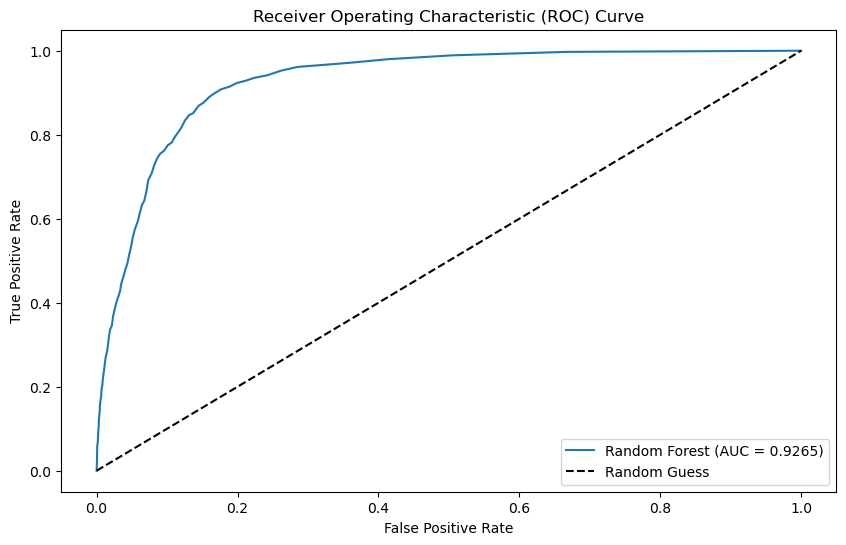

In [6]:
# Hypterparameter Tuning

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Best parameters from the search
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
print("\nBest Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# AUC-ROC Evaluation
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
